## Linear Regression on Iris Dataset

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Load the iris dataset

In [30]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Define the dependent and independent variables

In [31]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class']

## Encoding to convert into numerical data

In [32]:
# Convert categorical target variable to numerical using one-hot encoding
enc = OneHotEncoder()
y_encoded = enc.fit_transform(np.array(y).reshape(-1, 1)).toarray()
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fit and Predicting values 

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Fit the logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicted Values

In [35]:
y_pred = model.predict(X_test)
y_pred

array([ 1.24042717, -0.0470517 ,  2.24766081,  1.35145613,  1.29992031,
        0.01086695,  1.05103684,  1.82711171,  1.37586787,  1.06856218,
        1.70290027, -0.08634371, -0.16475544, -0.07704022, -0.03686594,
        1.39985227,  2.00557698,  1.04920521,  1.28290593,  1.97653781,
        0.01671723,  1.59884289,  0.07879941,  1.92338041,  1.85868954,
        1.88064781,  1.8044231 ,  2.04070546,  0.01997108,  0.01275306,
       -0.15594483, -0.0851098 ,  1.18613366, -0.00665099, -0.03059728,
        1.68967969,  1.29032331, -0.08105147, -0.09285881, -0.17301698,
        1.75510831,  1.37227344,  1.31790215, -0.07388053, -0.11485189])

## Plotting Graphs

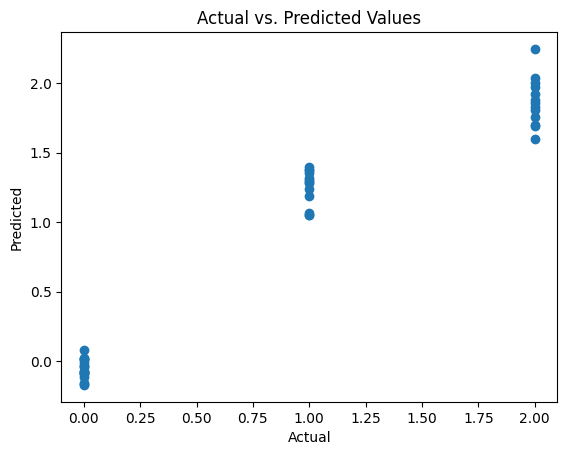

In [36]:
# Plot the predicted versus actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

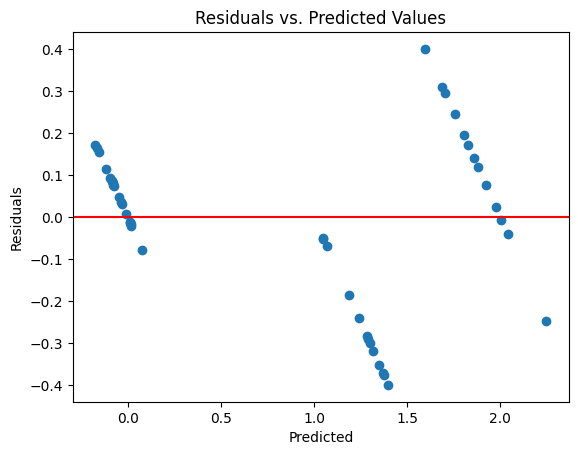

In [37]:
# Plot the residuals versus predicted values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()